 <font color='blue'><h2>Customer Spending Behavior Analysis Report</font>

<Font color='orange'> <h4>1. Load and explore data </h4> </font>


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("D:\Dec'24\DSCourse\data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.shape

(200, 5)

In [75]:
print(df.info())
print()
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000  

<Font color='red'> <h4>2. Clean and Preprocess Data </h4> </font>

<Axes: >

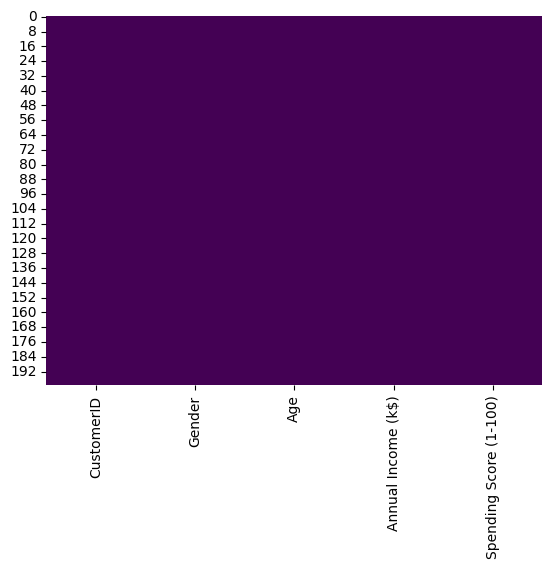

In [76]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [77]:
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})         # convert male with 0, and female with 1

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


<Font color='green'> <h4>3. Descriptive Statistics </h4> </font>


In [79]:
# Central Tendency
print('Mean Age: ', df['Age'].mean())
print('Meadian income: ', df['Annual Income (k$)'].median())

# Dispersion
print('Standard Deviation Spending Score: ', df['Spending Score (1-100)'].std())

Mean Age:  38.85
Meadian income:  61.5
Standard Deviation Spending Score:  25.823521668370173


<Font color='yellow'> <h4>4. Visualizations</h4> </font>


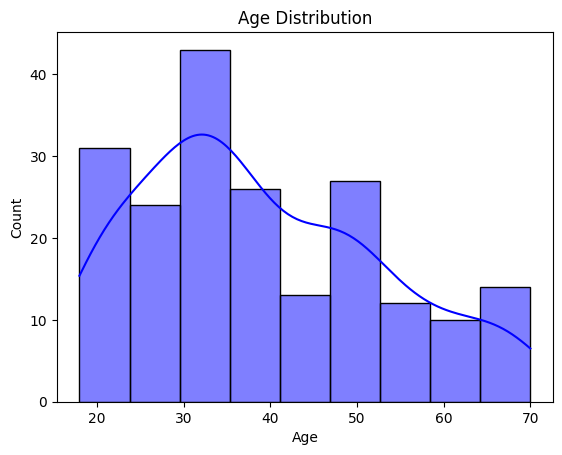

In [80]:
# Histogram of Age distribution
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

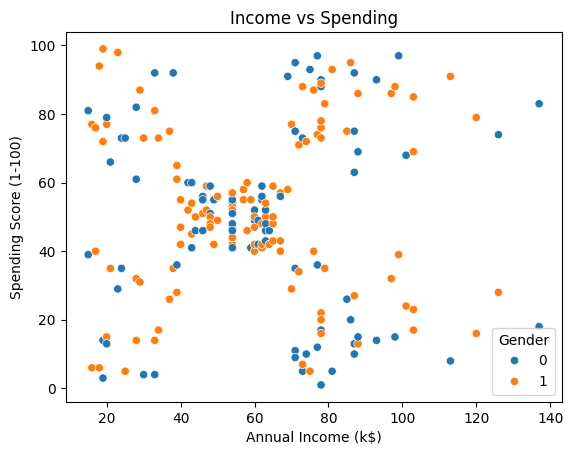

In [81]:
# Scatter plot for Income vs Spending score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender', data=df)
plt.title('Income vs Spending')
plt.show()

<Font color='violet'> <h4>5. Statistical Test </h4> </font>

In [82]:
# Correlation Matrix
print('Correlation matrix: ', df[['Annual Income (k$)', 'Spending Score (1-100)']].corr())

Correlation matrix:                          Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.009903
Spending Score (1-100)            0.009903                1.000000


In [83]:
# T-test
from scipy.stats import ttest_ind


# t-test for spending scores by gender
male_scores = df[df['Gender'] == 0]['Spending Score (1-100)']
female_scores = df[df['Gender'] == 1]['Spending Score (1-100)']

t_stat, p_value = ttest_ind(male_scores, female_scores)
print('T-Statistic: ', t_stat)
print('P-Value: ', p_value)


T-Statistic:  -0.8190464150660334
P-Value:  0.4137446589852174


In [92]:
from scipy.stats import f_oneway

# ANOVA for Spending Score by Age Groups
age_groups = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80])
anova_result = f_oneway(
    *[
        df.loc[age_groups == interval, 'Spending Score (1-100)']
        for interval in age_groups.cat.categories
    ]
)

print("ANOVA F-Statistic:", anova_result.statistic)
print("P-Value:", anova_result.pvalue)


ANOVA F-Statistic: 20.40059070488781
P-Value: 1.510354860990344e-11


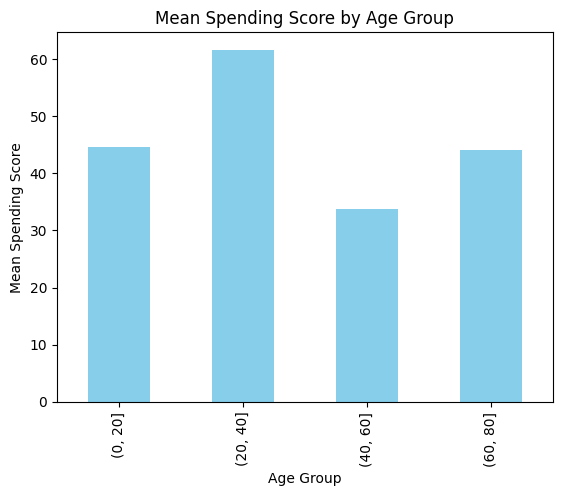

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean spending scores for each age group
age_group_means = df.groupby(age_groups)['Spending Score (1-100)'].mean()

# Plot
age_group_means.plot(kind='bar', color='skyblue')
plt.title('Mean Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Spending Score')
plt.show()


<font color='red'><h1>Report</h1></font>
<h4><strong>Key Sections</strong>:</h4>
<ol><li><strong>Introduction</strong>:<ul><li>This analysis focuses on customer spending behavior using a dataset containing 200 records of customer demographics and spending patterns.</li></ul></li>
<li><strong>Methods</strong>:<ul><li><strong>Data Cleaning:</strong><ul><li>Encoded <code>Gender</code> as numerical values (<code>Male = 0</code>, <code>Female = 1</code>).</li><li>Checked for missing values (none were found).</li></ul></li><li><strong>Statistical Techniques:</strong><ul><li><strong>Correlation Analysis:</strong> Examined relationships between <code>Annual Income</code> and <code>Spending Score</code>.</li><li><strong>T-Test:</strong> Compared average spending scores between genders.</li><li><strong>ANOVA:</strong> Tested if spending scores significantly differ across age groups.</li></ul></li><li><strong>Visualization Tools:</strong><br>Used <strong>Matplotlib</strong> and <strong>Seaborn</strong> for scatter plots, histograms, and bar charts.</li></ul></li>
<li><strong>Findings</strong>:<ul><li>Correlation insights <ul><li>Correlation matrix revealed:<ul><li>Weak correlation between <code>Annual Income</code> and <code>Spending Score</code> (correlation coefficient: <code>0.0099</code>).</li></ul></li><li>Interpretation: Higher income does not necessarily lead to higher spending scores.</li></ul></li>
<li>T-test results <ul><li><strong>T-Statistic:</strong> <code>-0.819</code></li><li><strong>P-Value:</strong> <code>0.414</code> (greater than 0.05).</li><li>Interpretation: There is <strong>no significant difference</strong> in spending scores between males and females.</li></ul></li>
<li>ANOVA results <ul><li><strong>F-Statistic:</strong> <code>20.40</code></li><li><strong>P-Value:</strong> <code>1.51e-11</code> (less than 0.05).</li><li>Interpretation: Spending scores differ significantly across age groups, suggesting that age influences spending behavior.</li></ul></li></ul></li>
<li><strong>Visuals</strong>:<ul><li><ol><li><p><strong>Scatter Plot:</strong></p><ul><li><strong>Income vs Spending Score:</strong> Showed no strong trend.<br></li></ul></li><li><p><strong>Histogram:</strong></p><ul><li><strong>Age Distribution:</strong> Highlighted a concentration of customers in their 30s and 40s.<br></li></ul></li><li><p><strong>Bar Chart:</strong></p><ul><li><strong>Mean Spending Score by Age Group:</strong> Showed younger customers (e.g., 20-40) had higher spending scores.<br></li></ul></li></ol></li></ul></li>
<li><strong>Conclusion</strong>:<ul><li><p><strong>Key Trends:</strong></p><ul><li>Age significantly impacts spending scores, with younger customers showing higher spending tendencies.</li><li>Gender does not influence spending scores significantly.</li><li>Income has little to no relationship with spending scores, suggesting other factors might drive spending habits.</li></ul></li><li><p><strong>Actionable Insights:</strong></p><ul><li>Businesses should target younger age groups (20-40) with marketing campaigns to maximize spending potential.</li><li>Further research could analyze additional factors like product categories or time of purchase to uncover deeper trends.</li></ul></li></ul></li></ol>